In [4]:
import pandas as pd
import os

data_dir = os.path.abspath(os.path.join("..", "data"))

df = pd.read_csv(os.path.join(data_dir, "test_results.csv"))
df.head()

,test_name,simulation_id,ticks,success
0,bf1-agent-move,test-d8ff44,1,True
1,bf1-agent-move,test-8bcea0,1,True
2,bf1-agent-move,test-dadcfd,1,True
3,bf1-agent-move,test-c1869b,1,True
4,bf1-agent-move,test-53e37c,1,True


/var/folders/zx/63q9k_gd4nb5sbdwq12wb_km0000gn/T/ipykernel_58178/4071869913.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


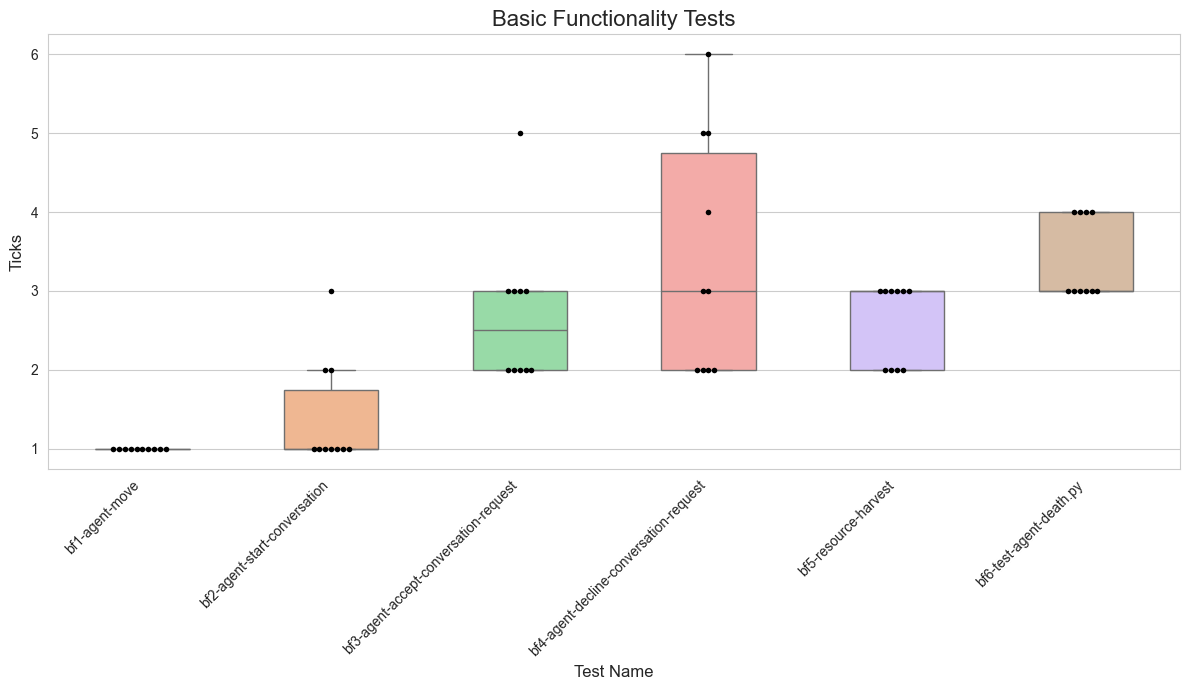

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Boxplot: shows min, Q1, median, Q3, max
sns.boxplot(
    x="test_name",
    y="ticks",
    data=df,
    order=df.groupby("test_name")["ticks"].median().sort_values().index,
    palette="pastel",
    width=0.5,
    showfliers=False,  # hide outliers, we'll show them in swarm
)

# Swarmplot: shows all actual data points
sns.swarmplot(
    x="test_name",
    y="ticks",
    data=df,
    order=df.groupby("test_name")["ticks"].median().sort_values().index,
    color="black",
    size=4,
)

plt.xticks(rotation=45, ha="right")
plt.title("Basic Functionality Tests", fontsize=16)
plt.xlabel("Test Name", fontsize=12)
plt.ylabel("Ticks", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(data_dir, f"test_results.png"), dpi=300)
plt.show()